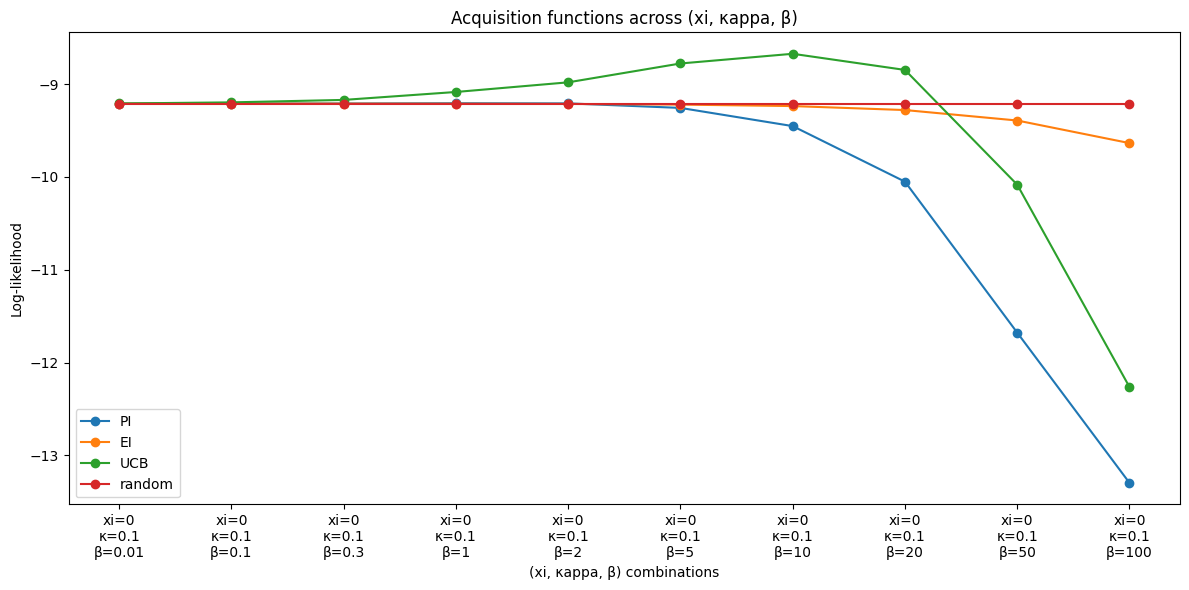

In [ ]:
import json
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

with open("../final_results.json", "r") as f:
    res = json.load(f)

rows = []

for key, lst in res.items():
    # key format: "xi=0_kappa=0.1"
    m = re.match(r"xi=([^_]+)_kappa=([^_]+)", key)
    xi = float(m.group(1))
    kappa = float(m.group(2))

    for d in lst:
        rows.append({
            "xi": xi,
            "kappa": kappa,
            "beta": float(d["beta"]),
            "ll_PI": float(d["ll_PI"]),
            "ll_EI": float(d["ll_EI"]),
            "ll_UCB": float(d["ll_UCB"]),
            "random": float(d["Random"]),
        })

df = pd.DataFrame(rows).sort_values(["xi", "kappa", "beta"]).reset_index(drop=True)

df = df.head(10)

# Create x-axis labels
df["label"] = df.apply(
    lambda r: f"xi={r.xi:g}\nκ={r.kappa:g}\nβ={r.beta:g}",
    axis=1
)

# Find separators between (xi,kappa) groups
group_key = df[["xi", "kappa"]].apply(lambda r: f"{r.xi}_{r.kappa}", axis=1)
separators = [
    i - 0.5 for i in range(1, len(df))
    if group_key.iloc[i] != group_key.iloc[i - 1]
]

# ---- Plot ----
x = np.arange(len(df))

plt.figure(figsize=(max(12, len(df) * 0.5), 6))

plt.plot(x, df["ll_PI"], marker="o", label="PI")
plt.plot(x, df["ll_EI"], marker="o", label="EI")
plt.plot(x, df["ll_UCB"], marker="o", label="UCB")
plt.plot(x, df["random"], marker="o", label="random")  # <-- new line

# Vertical lines between (xi,kappa) blocks
for s in separators:
    plt.axvline(s, linestyle="--", linewidth=1)

plt.xticks(x, df["label"])
plt.xlabel("(xi, κappa, β) combinations")
plt.ylabel("Log-likelihood")
plt.title("Acquisition functions across (xi, κappa, β)")
plt.legend()
plt.tight_layout()
plt.show()

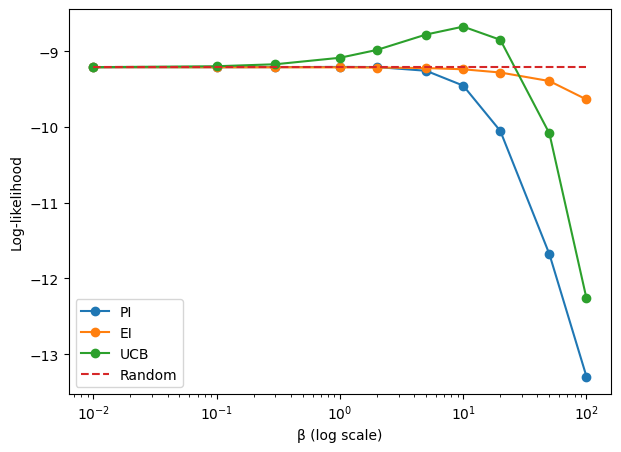

In [ ]:
subset = df[(df["xi"]==0) & (df["kappa"]==0.1)]

plt.figure(figsize=(7,5))
plt.plot(subset["beta"], subset["ll_PI"], marker="o", label="PI")
plt.plot(subset["beta"], subset["ll_EI"], marker="o", label="EI")
plt.plot(subset["beta"], subset["ll_UCB"], marker="o", label="UCB")
plt.plot(subset["beta"], subset["random"], linestyle="--", label="Random")

plt.xscale("log")
plt.xlabel("β (log scale)")
plt.ylabel("Log-likelihood")
plt.legend()
plt.show()